# 人間関係のネットワーク（スモールワールド）
・スモールワールドネットワークの作成<br>
・噂の拡散のシミュレーション<br>
・病気の拡散のシミュレーション

NetworkX
https://networkx.org/documentation/stable/index.html

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

#### グラフの基本的な書き方
ネットワークの作成：スモールワールドネットワークを作成するためにwatts_strogatz_graphを使用（nはノード数，kは次数，pはつなぎ変え確率）<br>
レイアウトの設定：ノードを円周上に配置するためにcircular_layoutを使用<br>
グラフの描画：ネットワークを設定したレイアウトで描画

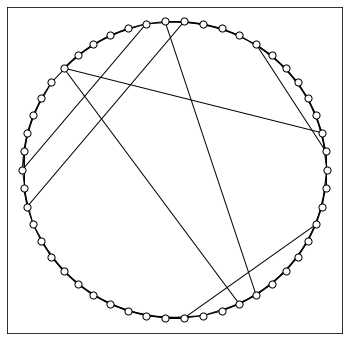

In [2]:
G = nx.watts_strogatz_graph(n = 50, k = 4, p = 0.1, seed = 1) 
pos = nx.circular_layout(G) 
plt.subplots(figsize=(6, 6))
nx.draw_networkx(G, pos,node_color="w", edgecolors='k', node_size=50, with_labels=False)

#### つなぎ変え確率の変更
確率を0.3に変更

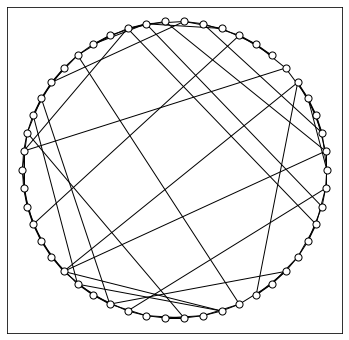

In [3]:
G = nx.watts_strogatz_graph(n = 50, k = 4, p = 0.3, seed = 1) 
pos = nx.circular_layout(G) 
plt.subplots(figsize=(6, 6))
nx.draw_networkx(G, pos,node_color="w", edgecolors='k', node_size=50, with_labels=False)
plt.savefig("sw_03.eps")

#### つなぎ変え確率の変更
確率を1.0に変更

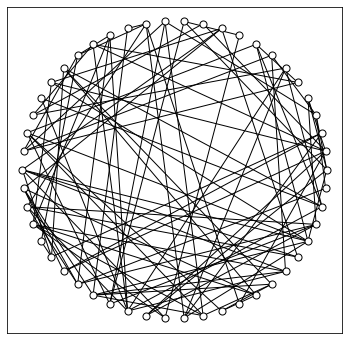

In [4]:
G = nx.watts_strogatz_graph(n = 50, k = 4, p = 1.0, seed = 1) 
pos = nx.circular_layout(G) 
plt.subplots(figsize=(6, 6))
nx.draw_networkx(G, pos,node_color="w", edgecolors='k', node_size=50, with_labels=False)
plt.savefig("sw_10.eps")

#### スモールワールド性
つなぎ変え確率を変化させたときの平均距離とクラスタ性を調べてグラフで表す

In [5]:
import numpy as np

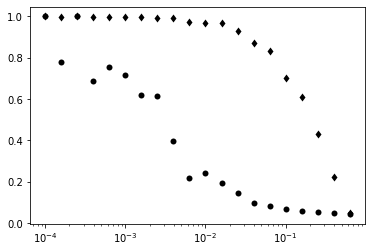

<Figure size 432x288 with 0 Axes>

In [6]:
sl = []
cl = []
st = 10**(np.arange(-4, 0, 0.2))

G = nx.watts_strogatz_graph(n = 1000, k = 4, p = 0) 
slb = nx.average_shortest_path_length(G)
clb = nx.average_clustering(G)

for p in st:
    G = nx.watts_strogatz_graph(n = 1000, k = 4, p = p) 
    sl.append(nx.average_shortest_path_length(G)/slb)
    cl.append(nx.average_clustering(G)/clb)
plt.semilogx(st,sl,marker="o",markerfacecolor='k',markeredgecolor='None',linestyle='None')
plt.semilogx(st,cl,marker="d",markerfacecolor='k',markeredgecolor='None',linestyle='None')
plt.show()
plt.savefig("sw_graph.eps")

#### 噂の拡散シミュレーション（SIモデル）
噂の拡散をシミュレーションして、アニメーションで表示

In [8]:
import matplotlib.animation as animation
from IPython.display import HTML
import copy
import random

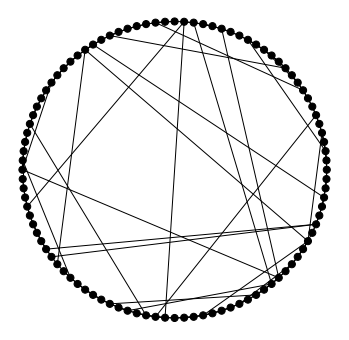

In [9]:
G = nx.watts_strogatz_graph(n = 100, k = 4, p = 0.10, seed=0) 
pos = nx.circular_layout(G)

num = nx.number_of_nodes(G)
nc = np.zeros(nx.number_of_nodes(G), dtype=int)
nc[num-1] = 1
plot_data = []

#color_list = ["b", "r", "g", "c", "m", "y"]#カラーで表示する場合
color_list = ["w", "k", "lightgrey", "c", "m", "y"]

fig = plt.figure(figsize = (6, 6)) 

def update(k):
    global nc, G
    plt.cla()
    plt.axis('off')
    colors = [color_list[x] for x in nc]
    nx.draw_networkx(G, pos, node_color=colors, edgecolors='k', node_size=50, with_labels=False)
    plot_data.append(sum(nc)/nx.number_of_nodes(G))
    if len(plot_data)==1:return
    nctmp = copy.copy(nc)
    for n0 in range(nx.number_of_nodes(G)):
        for n1 in list(nx.neighbors(G, n0)):
            if nc[n0] == 1 and nc[n1] ==0 and random.random()<0.5:
                nctmp[n1] = 1
    nc = copy.copy(nctmp)

ani = animation.FuncAnimation(fig, update, interval = 1, frames = 50, repeat=False)
HTML(ani.to_jshtml())


#### 噂の拡散の時系列グラフ
噂の拡散をシミュレーションして、噂を知っている人をプロット

つなぎ変え確率を変えて上記のシミュレーション行った後，plotデータをコピー

In [10]:
plot_data_010= copy.copy(plot_data)

つなぎ変え確率0.00，0.02，0.10，0.30としたデータをコピーした後次を事項すると，拡大における変え確率の影響を見ることができる

つなぎ変え確率0.00とした場合

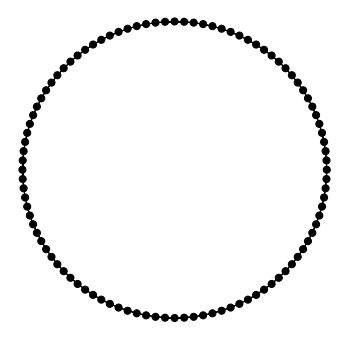

In [11]:
G = nx.watts_strogatz_graph(n = 100, k = 4, p = 0.00, seed=0) 
pos = nx.circular_layout(G)

num = nx.number_of_nodes(G)
nc = np.zeros(nx.number_of_nodes(G), dtype=int)
nc[num-1] = 1
plot_data = []

#color_list = ["b", "r", "g", "c", "m", "y"]#カラーで表示する場合
color_list = ["w", "k", "lightgrey", "c", "m", "y"]

fig = plt.figure(figsize = (6, 6)) 

def update(k):
    global nc, G
    plt.cla()
    plt.axis('off')
    colors = [color_list[x] for x in nc]
    nx.draw_networkx(G, pos, node_color=colors, edgecolors='k', node_size=50, with_labels=False)
    plot_data.append(sum(nc)/nx.number_of_nodes(G))
    if len(plot_data)==1:return
    nctmp = copy.copy(nc)
    for n0 in range(nx.number_of_nodes(G)):
        for n1 in list(nx.neighbors(G, n0)):
            if nc[n0] == 1 and nc[n1] ==0 and random.random()<0.5:
                nctmp[n1] = 1
    nc = copy.copy(nctmp)

ani = animation.FuncAnimation(fig, update, interval = 1, frames = 50, repeat=False)
HTML(ani.to_jshtml())
plot_data_000= copy.copy(plot_data)

つなぎ変え確率0.02とした場合

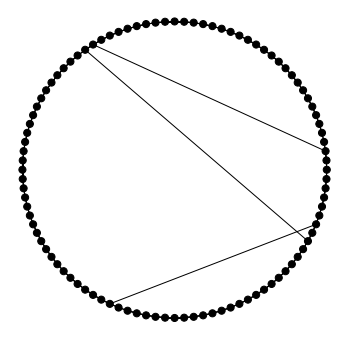

In [12]:
G = nx.watts_strogatz_graph(n = 100, k = 4, p = 0.02, seed=0) 
pos = nx.circular_layout(G)

num = nx.number_of_nodes(G)
nc = np.zeros(nx.number_of_nodes(G), dtype=int)
nc[num-1] = 1
plot_data = []

#color_list = ["b", "r", "g", "c", "m", "y"]#カラーで表示する場合
color_list = ["w", "k", "lightgrey", "c", "m", "y"]

fig = plt.figure(figsize = (6, 6)) 

def update(k):
    global nc, G
    plt.cla()
    plt.axis('off')
    colors = [color_list[x] for x in nc]
    nx.draw_networkx(G, pos, node_color=colors, edgecolors='k', node_size=50, with_labels=False)
    plot_data.append(sum(nc)/nx.number_of_nodes(G))
    if len(plot_data)==1:return
    nctmp = copy.copy(nc)
    for n0 in range(nx.number_of_nodes(G)):
        for n1 in list(nx.neighbors(G, n0)):
            if nc[n0] == 1 and nc[n1] ==0 and random.random()<0.5:
                nctmp[n1] = 1
    nc = copy.copy(nctmp)

ani = animation.FuncAnimation(fig, update, interval = 1, frames = 50, repeat=False)
HTML(ani.to_jshtml())
plot_data_002= copy.copy(plot_data)

つなぎ変え確率0.30とした場合

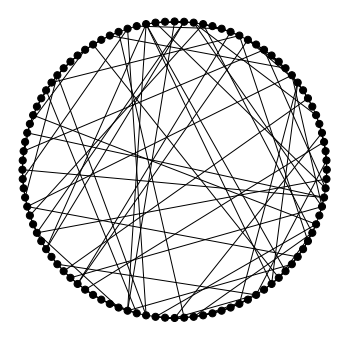

In [13]:
G = nx.watts_strogatz_graph(n = 100, k = 4, p = 0.30, seed=0) 
pos = nx.circular_layout(G)

num = nx.number_of_nodes(G)
nc = np.zeros(nx.number_of_nodes(G), dtype=int)
nc[num-1] = 1
plot_data = []

#color_list = ["b", "r", "g", "c", "m", "y"]#カラーで表示する場合
color_list = ["w", "k", "lightgrey", "c", "m", "y"]

fig = plt.figure(figsize = (6, 6)) 

def update(k):
    global nc, G
    plt.cla()
    plt.axis('off')
    colors = [color_list[x] for x in nc]
    nx.draw_networkx(G, pos, node_color=colors, edgecolors='k', node_size=50, with_labels=False)
    plot_data.append(sum(nc)/nx.number_of_nodes(G))
    if len(plot_data)==1:return
    nctmp = copy.copy(nc)
    for n0 in range(nx.number_of_nodes(G)):
        for n1 in list(nx.neighbors(G, n0)):
            if nc[n0] == 1 and nc[n1] ==0 and random.random()<0.5:
                nctmp[n1] = 1
    nc = copy.copy(nctmp)

ani = animation.FuncAnimation(fig, update, interval = 1, frames = 50, repeat=False)
HTML(ani.to_jshtml())
plot_data_030= copy.copy(plot_data)

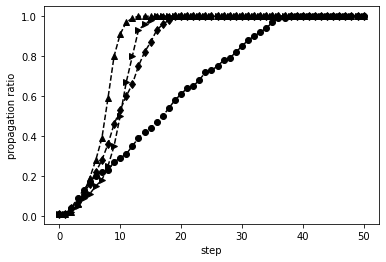

In [14]:
plt.xlabel("step")
plt.ylabel("propagation ratio")

plt.plot(plot_data_000, marker="o", color = "k", linestyle = "--")
plt.plot(plot_data_002, marker="d", color = "k", linestyle = "--")
plt.plot(plot_data_010, marker=">", color = "k", linestyle = "--")
plt.plot(plot_data_030, marker="^", color = "k", linestyle = "--")
plt.show()

#### 病気の拡散シミュレーション（SIRモデル）
未感染者、感染者に加えて回復者を含めた病気の拡散をシミュレーションして、アニメーションで表示

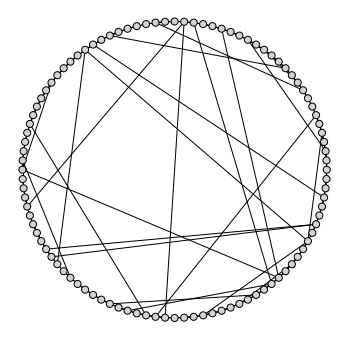

In [5]:
G = nx.watts_strogatz_graph(n = 100, k = 4, p = 0.1, seed=0) 
pos = nx.circular_layout(G)

num = nx.number_of_nodes(G)
nc = np.zeros(nx.number_of_nodes(G), dtype=int)
nc[num-1] = 1
nt = np.zeros(nx.number_of_nodes(G), dtype=int)
nt[num-1] = 10
plot_data1 = []
plot_data2 = []

#color_list = ["b", "r", "g", "c", "m", "y"]#カラーで表示する場合
color_list = ["w", "k", "lightgrey", "c", "m", "y"]

fig = plt.figure(figsize = (6, 6)) 

def update(k):
    global nc, nt, G
    plt.cla()
    plt.axis('off')
    colors = [color_list[x] for x in nc]
    nx.draw_networkx(G, pos, node_color=colors, edgecolors='k', node_size=50, with_labels=False)
    plot_data1.append(np.count_nonzero(nc==1))
    plot_data2.append(np.count_nonzero(nc==2))
    if len(plot_data1)==1:return
    for n0 in range(nx.number_of_nodes(G)):
        if nt[n0] > 0:
            nt[n0] -= 1
            if nt[n0] == 0:
                nc[n0] = 2
    nctmp = np.copy(nc)
    nttmp = np.copy(nt)
    for n0 in range(nx.number_of_nodes(G)):
        for n1 in list(nx.neighbors(G, n0)):
            if nc[n0] == 1 and nc[n1] ==0 and random.random()<0.5:
                nctmp[n1] = 1
                nttmp[n1] = 10
    nc = copy.copy(nctmp)
    nt = copy.copy(nttmp)

ani = animation.FuncAnimation(fig, update, interval = 1, frames = 50, repeat=False)
HTML(ani.to_jshtml())


#### 病気の拡散の時系列グラフ
病気の拡散をシミュレーションして、感染者と回復者をプロット

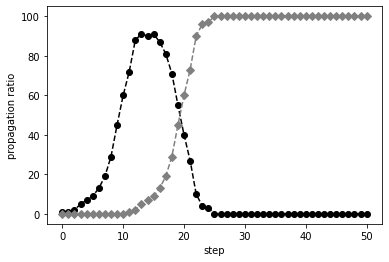

In [6]:
plt.xlabel("step")
plt.ylabel("propagation ratio")
plt.plot(plot_data1, marker="o", color = "k", linestyle = "--")
plt.plot(plot_data2, marker="D", color = "gray", linestyle = "--")
plt.show()